<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<font size=6>Foundations of Biomedical Computing</font>

<font size=5>Worksheet #2b - NumPy: Computations</font>

The focus of this assignment will be on the computational tools built into NumPy. These include aggregations, universal functions, masks, and sorting.
<br>
Understanding these computational tools in NumPy will make your life as a data scientist easier and more efficient. 

___

In [1]:
import numpy as np

___

<font size=5>Section 1: Aggregations</font>

Some of the most useful built-in NumPy methods are the aggregations. This is the case as often when faced with daunting amounts of data, a first step is to compute summary statistics for the data in question. Perhaps the most common summary statistics are the mean and standard deviation, which allow you to summarize the "typical" values in a dataset, but other aggregates are useful as well, such as the sum, product, median, minimum and maximum, quantiles, etc..
<br>
<br>


___

There are a vast number of statistical aggregations present in NumPy, and the whole list can be found here: https://numpy.org/doc/stable/reference/routines.statistics.html

1\. Create a 1D numpy array of 1000 random numbers from 0 to 999.
<br>
Now use numpy commands to find the following for the array:
- The Mean, Median, Max, and Min
[//]: # (Hello)


In [15]:
import random
x = np.array([random.randint(0,1000) for i in range(1000)])
print(x.mean()) 
print(x.max())
print(x.min())
print(np.median(x))



493.6
998
0
499.5


2\. Now create a 2D, 2x25 numpy array of random numbers from 0 to 999 and calculate the following:
- The Sum for axis = 0
- The Sum for axis = 1
- The total sum

What is the size of the output array for each of those sums? From this, what does it mean to perform an operation on axis=0 and axis=1? 

In [20]:
y = np.array([random.randint(0,1000) for i in range(50)]).reshape(2,25)
print(y)

[[289 464 129 313 567 872 771 699 768 738 751  63 455 502 480   3 749 866
  512 317 458  46 989 176 442]
 [149 661 890 830 354 142 368 472 521 237 717  30 758 800 812 374 690 348
  329 636 842 251 257 263  81]]


___

<font size=5>Section 2: Universal Functions</font>

There are a vast number of universal functions present in NumPy, and though many of them seem trivial to implement and use, the ease of use and speedup provided by NumPy make these functions critical.
<br>
<br>


NumPy also has UFunctions for more complex operations like logs, sqrt, cos, sin, abs, etc.

___

<font size=5>Section 3: Comparisons, Masks, and Boolean Logic</font>

Arguably the most empowering use of NumPy is masking. Masking allows you to quickly and easily filter large amounts of data from an array. For instance, masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criterion:
<br>
<br>
For example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

**Lets use the example of counting rainy days:**
<br>
For a moment let's imagine we have a series of data that represents the amount of precipitation each day for a year in a given city. In this case, we will load the daily rainfall statistics for the city of Seattle in 2014, using Pandas (which is the topic for the next lecture):

In [33]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
print(inches)

[0.         0.16141732 0.05905512 0.         0.         0.01181102
 0.48031496 0.38188976 0.22834646 0.16929134 0.83858268 0.05905512
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01968504 0.         0.
 0.         0.         0.         0.3503937  0.8503937  0.
 0.09055118 0.07874016 0.         0.         0.         0.
 0.         0.         0.2007874  0.01968504 0.72047244 0.66929134
 0.18110236 0.07086614 0.37007874 0.46062992 1.03937008 0.57086614
 0.5984252  0.03937008 0.11811024 0.11023622 0.0984252  0.24015748
 0.51181102 0.01181102 0.         0.         0.         0.01968504
 0.7519685  0.42125984 0.6496063  1.83858268 0.11811024 0.
 1.27165354 0.16929134 0.74015748 0.         0.         0.01968504
 0.27165354 0.31889764 1.09055118 0.01181102 0.         0.01968504
 0.         0.         0.         0.         0.         0.16141732
 0.14173228 0.01181102 0.87007874 0.5511811  0.         0.
 0.         0.         0.0984252  0.       

We can see that the array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.
<br>
As a first quick visualization, let's look at the histogram of rainy days, which was generated using Matplotlib (we will explore this tool more fully in a few weeks from now):

Text(0.5, 1.0, 'Histogram of daily rainfall in inches')

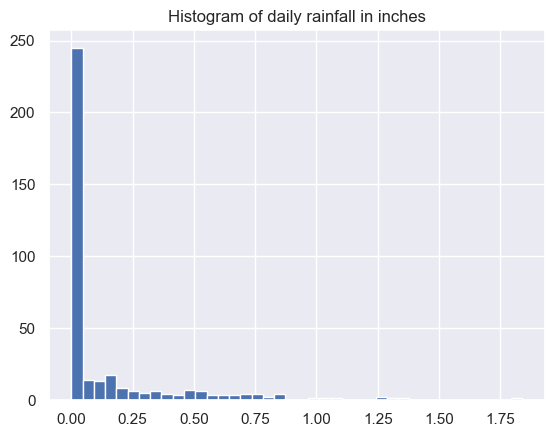

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches, 40);
plt.title('Histogram of daily rainfall in inches')

This histogram gives us a general idea of what the data looks like, However, it doesn't do a good job of conveying some information we'd like to see: 
- How many rainy days were there in the year? 
- What is the average precipitation on those rainy days? 
- How many days were there with more than half an inch of rain?

As you know, comparison operators (`<`, `>`) are also available as UFunctions to NumPy arrays (see this lecture and the last worksheet), so armed with this knowledge, we can do a lot to analyze this data.
<br>
<br>
But before that let's review the counting UFunctions built into NumPy.  Here are some examples:

4\. The following code creates a 3x4 2D array with values between 0 and 9 and a starting random state of 17.
<br>
Study the code and see how it solves the following problems. Uncomment each line to see the result.

- Generate a boolean array of which values are greater than 4
- Count the number of values less than 4
- Count the number of values less than 4 in another way, using a function we already know (remember that true=1)
- Find the number of values less than 4 in each row
- Find the number of values less than 4 in each column
- Find if there are any values greater than 8 (should return True or False)
- Find if there are any values less than 0 (should return True or False)
- Find if all values are less than 10 (should return True or False)
[//]: # (Hello)

Notice that all of these problems are solved with a single UFunction call.


In [29]:
import numpy as np
np.random.seed(17)
x = np.random.randint(9,size=(3,4))
print(x)
x < 4
np.count_nonzero(x < 4)
np.sum(x < 4)
np.sum(x < 4, axis=1)
np.sum(x < 6, axis=0)
np.any(x > 8)
np.any(x < 0)
np.all(x < 10) 

[[1 6 6 0]
 [6 4 7 4]
 [7 1 1 8]]


True


5\. Now using what you know from above, find the following from our Seattle data:
- The number of days without rain
- The number of days with rain
- Days with  more than 0.5 inches of rain
- Rainy days with less than 0.2 inches of rain
- The number of days between .5 and 1 inches of rain
[//]: # (Hello)
Once again, everything can be done with a single Ufunction call

In [46]:
import numpy as np
import pandas as pd
print(np.sum(inches == 0))
print(np.sum(inches != 0))
print(np.sum(inches > 0.5))
print(np.sum(inches < 0.2))
print(np.sum((inches < 1.0) + (inches > 0.5)))

215
150
37
290
365


In the preceding sections we looked at aggregates computed directly on Boolean arrays. A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves. Returning to our work from question 4, this time with masks, solve the following problem.

6\. Using the same initial array from question 4:
- Return a new array with only values less than 5 
[//]: # (Hello)
Once again, everything can be done with a Ufunction call, that looks sorta like a list comprehension

In [8]:
import numpy as np
np.random.seed(17)
x = np.random.randint(9,size=(3,4))
new_x = x [np.where(x < 5)] # obtained this use of brackets from stack overflow
print(x)
print(new_x)

[[1 6 6 0]
 [6 4 7 4]
 [7 1 1 8]]
[1 0 4 4 1 1]


Finally, lets apply everything we have learned so far to our rainfall example:

7\. Using masks and UFunctions, find the following:
- Median precipitation on rainy days in 2014
- 25th Percentile precipitation on summer days in 2014
- Maximum precipitation on summer days in 2014
- Standard Deviation precipitation on non-summer rainy days

In [35]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
print(inches)
print(np.median(inches))
print(np.percentile(inches, 25))
print(np.max(inches))
print(np.std(inches)) # am unsure how to discriminate between non-summer and summer days

[0.         0.16141732 0.05905512 0.         0.         0.01181102
 0.48031496 0.38188976 0.22834646 0.16929134 0.83858268 0.05905512
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01968504 0.         0.
 0.         0.         0.         0.3503937  0.8503937  0.
 0.09055118 0.07874016 0.         0.         0.         0.
 0.         0.         0.2007874  0.01968504 0.72047244 0.66929134
 0.18110236 0.07086614 0.37007874 0.46062992 1.03937008 0.57086614
 0.5984252  0.03937008 0.11811024 0.11023622 0.0984252  0.24015748
 0.51181102 0.01181102 0.         0.         0.         0.01968504
 0.7519685  0.42125984 0.6496063  1.83858268 0.11811024 0.
 1.27165354 0.16929134 0.74015748 0.         0.         0.01968504
 0.27165354 0.31889764 1.09055118 0.01181102 0.         0.01968504
 0.         0.         0.         0.         0.         0.16141732
 0.14173228 0.01181102 0.87007874 0.5511811  0.         0.
 0.         0.         0.0984252  0.       

___

<font size=5>Section 4: Sorting</font>

I wont go into the performance considerations of sorting here, but rest assured that sorting using the built in NumPy (or even python) methods is going to be much quicker than anything we can realistically throw together, and when working with massive datasets, this becomes a huge deal.

8\. Generate a 1d array with 20 random entries between 0 and 99
- Sort the array via a view
- Sort the array in place


In [26]:
import random
import numpy as np
import pandas as pd
array1 = np.array([random.randint(0,100) for i in range(20)])
print(np.sort(array1))
print(array1)
array2 = (np.sort(array1))
print(array2)

[ 3 14 16 17 19 21 29 29 31 32 33 40 45 52 56 62 82 87 93 99]
[87 93 82 32 52 56 33  3 14 45 21 29 16 17 31 29 40 99 62 19]
[ 3 14 16 17 19 21 29 29 31 32 33 40 45 52 56 62 82 87 93 99]


8\. Generate a 2d array with 54 random entries (6x9) between 0 and 9
- Sort the array
- Sort the array along each column
- Sort the array along each row

In [34]:
import random
import numpy as np
import pandas as pd
array3 = np.array([random.randint(0,9) for i in range(54)]).reshape(6,9)
print(array3)
print(np.sort(array3))
print(np.sort(array3, axis=0))
print(np.sort(array3, axis=1))

[[5 6 8 1 0 3 8 8 0]
 [2 4 6 3 4 6 0 6 8]
 [7 8 0 5 9 9 7 4 8]
 [7 5 2 6 6 0 0 6 3]
 [1 1 9 4 4 8 8 2 7]
 [9 6 1 9 2 1 2 8 7]]
[[0 0 1 3 5 6 8 8 8]
 [0 2 3 4 4 6 6 6 8]
 [0 4 5 7 7 8 8 9 9]
 [0 0 2 3 5 6 6 6 7]
 [1 1 2 4 4 7 8 8 9]
 [1 1 2 2 6 7 8 9 9]]
[[1 1 0 1 0 0 0 2 0]
 [2 4 1 3 2 1 0 4 3]
 [5 5 2 4 4 3 2 6 7]
 [7 6 6 5 4 6 7 6 7]
 [7 6 8 6 6 8 8 8 8]
 [9 8 9 9 9 9 8 8 8]]
[[0 0 1 3 5 6 8 8 8]
 [0 2 3 4 4 6 6 6 8]
 [0 4 5 7 7 8 8 9 9]
 [0 0 2 3 5 6 6 6 7]
 [1 1 2 4 4 7 8 8 9]
 [1 1 2 2 6 7 8 9 9]]


___

<font size=5>Continued Training for the Love Data Week Games</font>

Love Data Week is coming up soon - It's Feb 12-16!

(There will be seminars and data-inspired activities in the real world, but we'll imagine a fictitious charity games day to practice numpy skills.)

Team Toasted Ravioli and Team Bread-sliced Bagels now begin training for the pi eating contest.

First our teams must find some pi.

<font size=3>Hide the pi</font>

9a\. Your first job is to create a grid in which to hide the pi.  Do this by creating a numpy array with six rows and eight columns, filled with random integers between 0 and 9. To prepare the grid to receive pi, though, convert it to float format after creating it.

In [41]:
array4 = np.array([random.randint(0,9) for i in range(48)]).reshape(6,8)
print(array4)
array5 = array4.astype(float) # obtained astype from stack overflow
print(array5)

[[3 6 8 8 9 9 2 7]
 [0 4 5 5 2 5 2 8]
 [9 8 2 5 9 8 9 6]
 [7 6 3 6 5 3 7 8]
 [8 1 6 4 4 5 3 6]
 [7 9 7 0 5 2 7 1]]
[[3. 6. 8. 8. 9. 9. 2. 7.]
 [0. 4. 5. 5. 2. 5. 2. 8.]
 [9. 8. 2. 5. 9. 8. 9. 6.]
 [7. 6. 3. 6. 5. 3. 7. 8.]
 [8. 1. 6. 4. 4. 5. 3. 6.]
 [7. 9. 7. 0. 5. 2. 7. 1.]]


9b\. Now use numpy commands to create a boolean mask of the same size as your pi grid, randomly filled with boolean True and False.

In [3]:
import random
import numpy as np
array4 = np.array([random.randint(0,9) for i in range(48)]).reshape(6,8)
print(array4)
array5 = array4.astype(float) # obtained astype from stack overflow
print(array5)
array_mask = np.random.choice([True, False], size = array5.shape) # referenced ChatGPT for help on the formatting of .shape in a mask
print(array_mask)

[[8 6 0 2 8 4 7 5]
 [3 9 8 5 8 3 9 4]
 [0 9 3 5 7 3 8 4]
 [6 0 6 2 9 2 2 7]
 [7 2 6 7 2 4 1 7]
 [9 0 1 3 8 4 9 5]]
[[8. 6. 0. 2. 8. 4. 7. 5.]
 [3. 9. 8. 5. 8. 3. 9. 4.]
 [0. 9. 3. 5. 7. 3. 8. 4.]
 [6. 0. 6. 2. 9. 2. 2. 7.]
 [7. 2. 6. 7. 2. 4. 1. 7.]
 [9. 0. 1. 3. 8. 4. 9. 5.]]
[[False  True False False False  True False  True]
 [ True False False  True False False  True  True]
 [False False False False False  True  True  True]
 [False  True False False  True  True  True False]
 [ True  True  True  True  True False False False]
 [False  True False False  True  True False  True]]


9c\. Finally, use your boolean mask to hide pi (np.pi) in the locations of your grid corresponding to True in your mask.

In [7]:
import random
import numpy as np
import math
array4 = np.array([random.randint(0,9) for i in range(48)]).reshape(6,8)
array5 = array4.astype(float) # obtained astype from stack overflow
array_mask = np.random.choice([True, False], size = array5.shape)
print(array_mask)
array5[array_mask] = np.pi
print(array5)

[[False False False False False  True  True False]
 [False  True False False False  True False  True]
 [False  True  True False  True  True False  True]
 [ True False  True  True False  True  True  True]
 [ True  True False  True  True  True  True  True]
 [ True False  True  True  True  True False  True]]
[[3.         3.         1.         2.         8.         3.14159265
  3.14159265 9.        ]
 [8.         3.14159265 1.         8.         0.         3.14159265
  3.         3.14159265]
 [3.         3.14159265 3.14159265 0.         3.14159265 3.14159265
  9.         3.14159265]
 [3.14159265 5.         3.14159265 3.14159265 0.         3.14159265
  3.14159265 3.14159265]
 [3.14159265 3.14159265 2.         3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265]
 [3.14159265 2.         3.14159265 3.14159265 3.14159265 3.14159265
  3.         3.14159265]]


10a\. Now that the pi are hidden, use numpy commands to slice the grid into two equal parts (vertically or horizontally) and give one part to each team.

In [17]:
import random
import numpy as np
import math
array4 = np.array([random.randint(0,9) for i in range(48)]).reshape(6,8)
array5 = array4.astype(float)
array_mask = np.random.choice([True, False], size = array5.shape)
array5[array_mask] = np.pi
print(array5)
sub_arrays = np.hsplit(array5, 2)
print(sub_arrays)
Bagels = sub_arrays[0]
print(Bagels)
Raviolis = sub_arrays[1]
print(Raviolis)

[[8.         3.14159265 3.14159265 3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265]
 [3.14159265 9.         1.         6.         3.14159265 9.
  3.14159265 3.14159265]
 [7.         3.14159265 7.         3.14159265 3.14159265 3.14159265
  3.14159265 3.14159265]
 [0.         3.14159265 3.14159265 3.14159265 3.         3.14159265
  9.         3.14159265]
 [4.         3.14159265 2.         0.         4.         3.
  3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265 5.         3.14159265 5.
  3.         4.        ]]
[array([[8.        , 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 9.        , 1.        , 6.        ],
       [7.        , 3.14159265, 7.        , 3.14159265],
       [0.        , 3.14159265, 3.14159265, 3.14159265],
       [4.        , 3.14159265, 2.        , 0.        ],
       [3.14159265, 3.14159265, 3.14159265, 5.        ]]), array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 9.        , 3.14159265, 3.14159265],
      

<font size=3>Eat the pi</font>

10b\. For each team, write code that reports how many pi are in their grid. Then, each team must eat their pi by replacing each instance of pi with the mean value of their grids using np.where( ). Show the new grids for each team.

In [44]:

print(np.count_nonzero(Bagels == np.pi))
Bagels_mean = np.mean(Bagels)
Bagels_eatpi = np.where(Bagels == np.pi, Bagels_mean, Bagels)
print(Bagels_eatpi)

print(np.count_nonzero(Raviolis == np.pi))
Raviolis_mean = np.mean(Raviolis)
Raviolis_eatpi = np.where(Raviolis == np.pi, Raviolis_mean, Raviolis)
print(Raviolis_eatpi)


11
[[1.         3.81489663 3.81489663 3.81489663]
 [3.81489663 2.         7.         3.81489663]
 [1.         1.         3.81489663 3.81489663]
 [6.         3.         8.         3.81489663]
 [2.         8.         6.         6.        ]
 [3.81489663 3.81489663 3.81489663 6.        ]]
12
[[7.         1.         3.86246299 3.86246299]
 [8.         3.86246299 1.         3.86246299]
 [3.86246299 3.86246299 9.         3.86246299]
 [9.         2.         3.         3.86246299]
 [5.         3.86246299 3.86246299 4.        ]
 [0.         3.86246299 3.86246299 6.        ]]


Finally, the teams calculate their score by summing all of the elements of their grid.  Which team had the largest sum?

In [43]:

print(np.sum(Bagels_eatpi) > np.sum(Raviolis_eatpi)) # just practicng bools
print(np.sum(Bagels_eatpi))
print(np.sum(Raviolis_eatpi))
 #Team Raviolis had the larger sum!!!!!!!!

False
98.96386296184853
101.34955592153875


10\. If you have any additional questions, comments, or concerns, please state them below and we will do our best to address them

In [ ]:
N/A